# Acesso ao SerproLLM com Python
Autor: Antonio Alisio de Meneses Cordeiro

Este notebook ensina como se conectar a um modelo de linguagem hospedado no SerproLLM

Para maiores informações, visite o [portal SerproLLM](https://llm.ia.serpro.gov.br/)

In [4]:
# Pré-requisitos:
%pip install -q pandas requests langchain langchain-openai langchain-community openai Pillow matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import requests
from langchain_openai import OpenAI
from langchain.callbacks import get_openai_callback 
#from utils_tutorial import *
#from prompts import *
import pandas as pd
from IPython.display import Image, display


## 1. Configuração do certificado SSL
- Download: https://lcrspo.serpro.gov.br/ca/ca-pro.pem
- Mais informações: https://llm.ia.serpro.gov.br/integracao/#problemas-de-

In [6]:
certificados_serpro = "ca-pro.pem"  # Atualize se necessário
url = 'https://lcrspo.serpro.gov.br/ca/ca-pro.pem'

if not os.path.exists(certificados_serpro):
    response = requests.get(url, verify=False)

    with open('ca-pro.pem', 'wb') as f:
        f.write(response.content)

c:\Users\s056558027\Documents\SERPRO_DVLP\consignacao_semantica\GIT\scripts\3_API\semantica_consignacao_env\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lcrspo.serpro.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [7]:
certificados_serpro = "ca-pro.pem"  # Atualize se necessário

os.environ["REQUESTS_CA_BUNDLE"] = certificados_serpro
os.environ["SSL_CERT_FILE"] = certificados_serpro

## 2. Credenciais (via PLIN)
- Solicite acesso ao SerproLLM em https://plin.estaleiro.serpro.gov.br/

In [8]:
CLIENT_ID = "lS3LI_KbE2F9dLN1nvORdyl91tga"
CLIENT_SECRET = "W0vfA0igvbkW4Gp3m1b3sIycJXYa"

## 3. Escolha do ambiente do Serpro LLM ('exp' ou 'prod')

In [9]:
ambiente = "exp"  # ou 'prod'

if ambiente == "prod":
    url_base = "https://api-serprollm.ni.estaleiro.serpro.gov.br"
elif ambiente == "exp":
    url_base = "https://e-api-serprollm.ni.estaleiro.serpro.gov.br"
else:
    raise ValueError("Ambiente inválido. Use 'exp' ou 'prod'.")

url_token = f"{url_base}/oauth2/token"
url_api = f"{url_base}/gateway/v1"

## 4. Autenticação e obtenção do token

In [10]:
dados = {"grant_type": "client_credentials"}
resposta = requests.post(url_token, data=dados, auth=(CLIENT_ID, CLIENT_SECRET))
resposta.raise_for_status()

access_token = resposta.json()["access_token"]
print("Token obtido com sucesso!")

Token obtido com sucesso!


## 5. Listar modelos disponíveis

Devemos escolher modelos multimodais, como o pixtral.

In [11]:
cabecalhos = {"Authorization": f"Bearer {access_token}"}
resposta = requests.get(f"{url_api}/models", headers=cabecalhos)
resposta.raise_for_status()

modelos = resposta.json().get("data", [])
for modelo in modelos:
    print(f"- {modelo['id']} — {modelo.get('description', 'sem descrição')}")

- codestral-22b — sem descrição
- deepseek-r1-distill-qwen-14b — sem descrição
- gemma-3-4b-it — sem descrição
- llama-3.1-8B-instruct — sem descrição
- mistral-nemo-instruct — sem descrição
- pixtral-12b — sem descrição
- qwen3-32b — sem descrição
- all-minilm-l6-v2 — sem descrição
- multilingual-e5-large — sem descrição
- bge-reranker-v2-m3 — sem descrição


In [9]:
MODELO = "pixtral-12b"

## 6. Enviar prompt e imagem para o modelo

In [10]:
%%time
llm = ClienteMultimodal(
            api_key=access_token,
            base_url=url_api,
            model_name=MODELO
        )

CPU times: user 14 μs, sys: 1 μs, total: 15 μs
Wall time: 18.8 μs


## Descrição de imagens

In [11]:
path_imagem = "./imagens/imagem_1.png"
print(f"\nTentando descrever a imagem: {path_imagem}")

resposta_llm, tokens_entrada, tokens_saida = llm.inferencia_com_imagem(path_imagem,"Descreva esta imagem em detalhes.", uso_tokens=True)


Tentando descrever a imagem: ./imagens/imagem_1.png


In [12]:
print(f"Quantidade de tokens de entrada: {tokens_entrada}")
print(f"Quantidade de tokens de saída: {tokens_saida}")
print("\nResposta do modelo:")
print(f"Descrição: {resposta_llm}")

Quantidade de tokens de entrada: 2352
Quantidade de tokens de saída: 169

Resposta do modelo:
Descrição: A imagem retrata um edifício com uma fachada bege relativamente simples. Do lado do edifício, há dois logotipos ou textos distintos. O primeiro logotipo no canto superior esquerdo consiste em um foice branca sobre um fundo azul claro Dentado, ao lado do texto em azul claro 'S'. O segundo texto, 'SLRPRO', está posicionado logo abaixo e um pouco à direita do primeiro logotipo, com a letra 'O' especificado com um ponto vermelho, advindo do azul claro. O edifício e seus arredores apresentam um ambiente limpo e moderno, com um toque de detalhes em estilo industrial e design geo-profundo. A atmosfera geral parece ser profissional e assegurada, possivelmente indicando uma empresa ligada a serviços profissionais ou institucionais.


## Classificação de Documentos

In [13]:
print(f"Quantidade de tokens de entrada: {tokens_entrada}")
print(f"Quantidade de tokens de saída: {tokens_saida}")
print("\nResposta do modelo:")
print(f"Descrição: {resposta_llm}")

Quantidade de tokens de entrada: 2352
Quantidade de tokens de saída: 169

Resposta do modelo:
Descrição: A imagem retrata um edifício com uma fachada bege relativamente simples. Do lado do edifício, há dois logotipos ou textos distintos. O primeiro logotipo no canto superior esquerdo consiste em um foice branca sobre um fundo azul claro Dentado, ao lado do texto em azul claro 'S'. O segundo texto, 'SLRPRO', está posicionado logo abaixo e um pouco à direita do primeiro logotipo, com a letra 'O' especificado com um ponto vermelho, advindo do azul claro. O edifício e seus arredores apresentam um ambiente limpo e moderno, com um toque de detalhes em estilo industrial e design geo-profundo. A atmosfera geral parece ser profissional e assegurada, possivelmente indicando uma empresa ligada a serviços profissionais ou institucionais.


## Inspeção visual

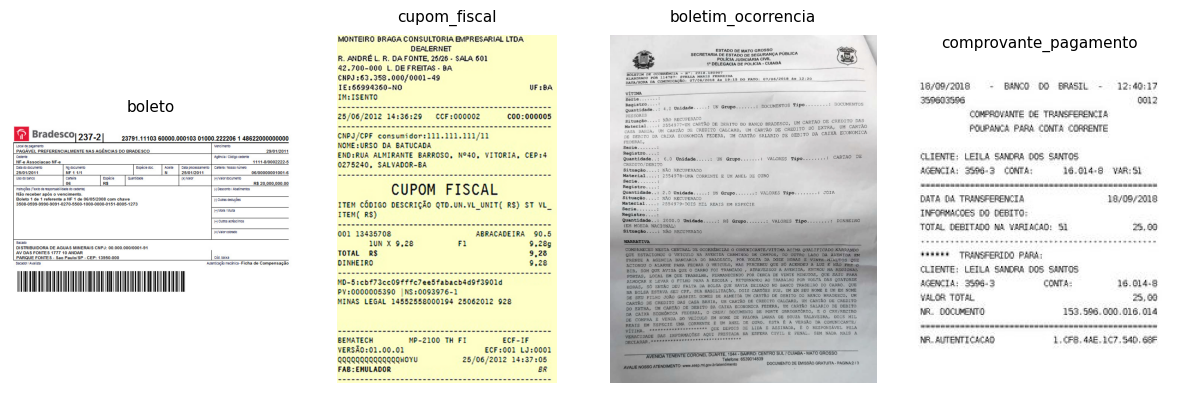

In [14]:
lista_imagens = [
    ("./imagens/doc_1.jpg", "boleto"),
    ("./imagens/doc_2.jpg", "cupom_fiscal"),
    ("./imagens/doc_3.jpg", "boletim_ocorrencia"),
    ("./imagens/doc_4.jpg", "comprovante_pagamento"),
]

exibir_grade_imagens(lista_imagens)

In [15]:
# Lista para armazenar os resultados
resultados = []

# Iterar sobre a lista de imagens
for caminho, classe in lista_imagens:
    try:
        resposta, tokens_entrada, tokens_saida = llm.inferencia_com_imagem(caminho,prompt_classificacao, uso_tokens=True)
        resposta_dict = carregar_json_markdown(resposta)
    except Exception as e:
        resposta = f"[ERRO] {e}"
    
    resultados.append({
        "imagem": caminho,
        "classe_real": classe,
        "classe_predita": resposta_dict['classe'],
        "tokens_entrada": tokens_entrada,
        "tokens_saida": tokens_saida,
        "resposta_llm": resposta
    })

# Criar o DataFrame
df_resultado = pd.DataFrame(resultados)

# Exibir ou salvar conforme necessário
# print(df_resultado)


In [16]:
df_resultado

,imagem,classe_real,classe_predita,tokens_entrada,tokens_saida,resposta_llm
0,./imagens/doc_1.jpg,boleto,boleto,2528,50,"```json\n{\n ""classe"": ""boleto"",\n ""justific..."
1,./imagens/doc_2.jpg,cupom_fiscal,cupom_fiscal,3034,71,"```json\n{\n ""classe"": ""cupom_fiscal"",\n ""ju..."
2,./imagens/doc_3.jpg,boletim_ocorrencia,boletim_ocorrencia,4098,95,"```json\n{\n ""classe"": ""boletim_ocorrencia"",\..."
3,./imagens/doc_4.jpg,comprovante_pagamento,comprovante_pagamento,1640,57,"```json\n{\n ""classe"": ""comprovante_pagamento..."


## OCR de documentos em formato de imagem

Pré-visualização do documento a ter o texto reconhecido.

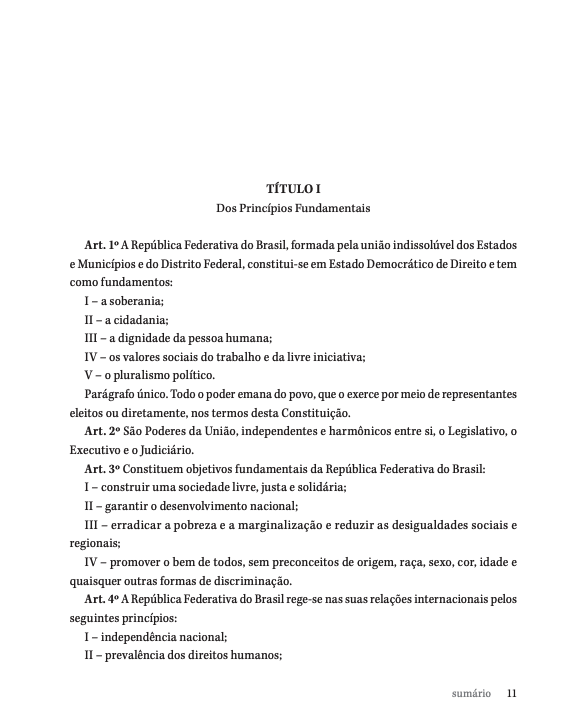

In [17]:
imagem = "./imagens/ocr_teste.png"
display(Image(filename=imagem, width=500))

In [18]:
resposta, tokens_entrada, tokens_saida = llm.inferencia_com_imagem(imagem,prompt_ocr, uso_tokens=True)

In [19]:
print(resposta)

```
TÍTULO I
Dos Princípios Fundamentais

Art. 1° A República Federativa do Brasil, formada pela união indissolúvel dos Estados e Municípios e do Distrito Federal, constitui-se no Estado Democrático de Direito e tem como fundamentos:
I - a soberania;
II - a cidadania;
III - a dignidade da pessoa humana;
IV - os valores sociais do trabalho e da livre iniciativa;
V - o pluralismo político.

Parágrafo único. Todo o poder emana do povo, que o exerce por meio de representantes eleitos ou diretamente, nos termos desta Constituição.

Art. 2° São Poderes da União, independentes e harmônicos entre si, o Legislativo, o Executivo e o Judiciário.

Art. 3° Constituem objetivos fundamentais da República Federativa do Brasil:
I - constrouir uma sociedade livre, justa e solidária;
II - garantir o desenvolvimento nacional;
III - erradicar a pobreza e a marginalização e reduzir as desigualdades sociais e regionais;
IV - promover o bem de todos, sem preconceitos de origem, raça, sexo, cor, idade e quaisq